In [50]:
import json
import pandas as pd

## Import dataset 

In [182]:
data = pd.read_json('D:/Documents/IIT/3rd year/deep learning/cw p2/yelp dataset/yelp_academic_dataset_review.json', orient="records", lines= True, nrows=200)


## Exploring Data

In [3]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [4]:
data.describe()

,stars,useful,funny,cool
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,3.838600,0.86880,0.252400,0.340000
std,1.357983,1.71947,0.904244,0.968601
min,1.000000,0.00000,0.000000,0.000000
25%,3.000000,0.00000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000
75%,5.000000,1.00000,0.000000,0.000000
max,5.000000,34.00000,19.000000,13.000000


In [37]:
data.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [6]:
data.nunique()


review_id      5000
user_id        4843
business_id    2663
stars             5
useful           22
funny            14
cool             14
text           5000
date           4997
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(5000, 9)

## Remove reviews that are not in english

In [183]:
import langdetect

for i in range(len(data.loc[:,'text'])):
    try:
        detected_lan = langdetect.detect(data.loc[i,'text'])
        if detected_lan != "en":
            print(f"detected language {detected_lan}")
            print(i)
            data.drop(i, inplace=True)
    except:
        pass
        

## Check whether reviews that are not english, got removed

In [184]:
for text in data.loc[:,'text']:
    try:
        detected_lan = langdetect.detect(text)
        if detected_lan != "en":
            print(detected_lan)
            print(text)
    except Exception as e:
        print (e)
        pass


In [185]:
data.reset_index(inplace = True, drop = True)

In [186]:
for i in range(len(data.loc[:,'text'])):
    # try
        print(data.loc[i,'text'])
        print(i)
    # except Exception as e:
    #     print (e)
    #     pass

If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.
0
I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.

For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).

There is no way I can write this review without giving Russell, the owner o

In [187]:
print(data.loc[830,'text'])

KeyError: 830

## Cleaning up grammar in all reviews

In [188]:
bad_chars = ['#', '@','*','^','_','{','}','[',']',':',';','~','`','<','>','|','+','=','%','$']

In [189]:
for text in data.loc[:,'text']:
    temp = text
    #Remove bad characters
    for chars in bad_chars:
        temp = temp.replace(chars, '')
    #lowercase all letters in data
    temp = temp.lower()
    data.replace(to_replace=text, value=temp, inplace=True)

## Plots

<AxesSubplot:>

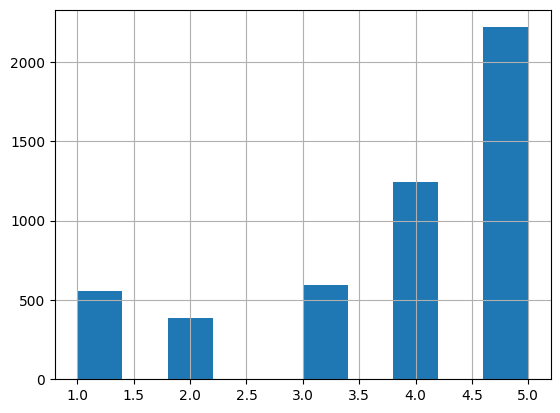

In [67]:
data['stars'].hist()

# Start of Training model

# import Dependencies

In [190]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, BertTokenizer, BertForSequenceClassification
from transformers import trainer
import tensorflow as tf
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import evaluate
#from datasets import Dataset
import numpy as np
import torch

# Instantiate Model


In [191]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-uncased')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Encode and Calculate Sentiment

In [124]:
tokens = tokenizer.encode("sad", return_tensors='pt')

In [71]:
result = model(tokens)

In [72]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.2962,  1.0697,  0.4671, -0.9912, -1.5103]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [73]:
result.logits

tensor([[ 1.2962,  1.0697,  0.4671, -0.9912, -1.5103]],
       grad_fn=<AddmmBackward0>)

In [74]:
int(torch.argmax(result.logits))+1

1

In [192]:
data['stars_temp'] = data['stars'].map(lambda x: x - 1)

In [193]:
data['stars_temp']

0      2
1      4
2      2
3      4
4      3
      ..
195    3
196    3
197    3
198    4
199    4
Name: stars_temp, Length: 200, dtype: int64

In [194]:
X = data.loc[:,'text']
y = data.loc[:,'stars_temp']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
X_train

79     we visited once and were very disappointed in ...
197    as airport grab-and-go restaurants are, earl d...
38     my boyfriend and i tried this deli for the fir...
24     i was really between 3 and 4 stars for this on...
122    we stayed at the saint last year for a girl's ...
                             ...                        
106    best place for salads! i go there every time i...
14     the bun makes the sonoran dog. it's like a snu...
92     id you haven't been to the smoothie king cente...
179    great experience purchasing a washer and dryer...
102    after trying a few ramen places with crazy var...
Name: text, Length: 160, dtype: object

In [197]:
train_tokens = tokenizer(X_train.tolist(), truncation=True, padding=True, return_tensors='pt')
test_tokens = tokenizer(X_test.tolist(), truncation=True, padding=True, return_tensors='pt')

In [198]:
print(train_tokens)

{'input_ids': tensor([[  101, 11312, 30010,  ...,     0,     0,     0],
        [  101, 10146, 12610,  ...,     0,     0,     0],
        [  101, 11153, 74159,  ...,     0,     0,     0],
        ...,
        [  101, 12249, 10855,  ...,     0,     0,     0],
        [  101, 11838, 16277,  ...,     0,     0,     0],
        [  101, 10515, 30517,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [199]:
# Extract input_ids, attention_mask, and token_type_ids
train_input_ids = train_tokens['input_ids']
train_attention_mask = train_tokens['attention_mask']

In [144]:
type(y_train)

pandas.core.series.Series

In [200]:
test_input_ids = test_tokens['input_ids']
test_attention_mask = test_tokens['attention_mask']

In [201]:
# Convert to PyTorch tensors
train_input_ids = torch.tensor(train_input_ids)
train_attention_mask = torch.tensor(train_attention_mask)

test_input_ids = torch.tensor(test_input_ids)
test_attention_mask = torch.tensor(test_attention_mask)

c:\Users\Diren\.conda\envs\sentiment_ana\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
c:\Users\Diren\.conda\envs\sentiment_ana\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\Diren\.conda\envs\sentiment_ana\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
c:\Users\Diren\.conda\envs\sentiment_ana\lib\site-packages\ipykernel_

In [202]:
class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]  # If you have labels
        }

# Create datasets
train_dataset = CustomDataset(input_ids=train_input_ids, attention_mask=train_attention_mask, labels=y_train.to_list())
test_dataset = CustomDataset(input_ids=test_input_ids, attention_mask=test_attention_mask, labels=y_test.to_list())

# Create data loaders
batch_size = 1  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [135]:
train_loader

In [203]:
# Set up training arguments
training_args = TrainingArguments(
    output_dir="./sentiment_transfer_learning_transformer/",          
    logging_dir='./sentiment_transfer_learning_transformer/logs',            
    logging_strategy='epoch',
    logging_steps=100,    
    num_train_epochs=2,              
    per_device_train_batch_size=4,  
    per_device_eval_batch_size=4,  
    learning_rate=5e-6,
    seed=42,
    save_strategy='epoch',
    save_steps=100,
    evaluation_strategy='epoch',
    eval_steps=100,
    load_best_model_at_end=True
)

In [204]:
# Number of evaluation modules
print(f'There are {len(evaluate.list_evaluation_modules())} evaluation models in Hugging Face.\n')

# List all evaluation metrics
evaluate.list_evaluation_modules()

There are 186 evaluation models in Hugging Face.



['lvwerra/test',
 'precision',
 'code_eval',
 'roc_auc',
 'cuad',
 'xnli',
 'rouge',
 'pearsonr',
 'mse',
 'super_glue',
 'comet',
 'cer',
 'sacrebleu',
 'mahalanobis',
 'wer',
 'competition_math',
 'f1',
 'recall',
 'coval',
 'mauve',
 'xtreme_s',
 'bleurt',
 'ter',
 'accuracy',
 'exact_match',
 'indic_glue',
 'spearmanr',
 'mae',
 'squad',
 'chrf',
 'glue',
 'perplexity',
 'mean_iou',
 'squad_v2',
 'meteor',
 'bleu',
 'wiki_split',
 'sari',
 'frugalscore',
 'google_bleu',
 'bertscore',
 'matthews_correlation',
 'seqeval',
 'trec_eval',
 'rl_reliability',
 'jordyvl/ece',
 'angelina-wang/directional_bias_amplification',
 'cpllab/syntaxgym',
 'lvwerra/bary_score',
 'kaggle/amex',
 'kaggle/ai4code',
 'hack/test_metric',
 'yzha/ctc_eval',
 'codeparrot/apps_metric',
 'mfumanelli/geometric_mean',
 'daiyizheng/valid',
 'poseval',
 'erntkn/dice_coefficient',
 'mgfrantz/roc_auc_macro',
 'Vlasta/pr_auc',
 'gorkaartola/metric_for_tp_fp_samples',
 'idsedykh/metric',
 'idsedykh/codebleu2',
 'idsed

In [205]:
# Function to compute the metric
def compute_metrics(eval_pred):
    metric = evaluate.load("accuracy")
    logits, labels = eval_pred
    # probabilities = tf.nn.softmax(logits)
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [206]:
model.train()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [207]:
# Train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1 )]
)

trainer.train()

 50%|█████     | 40/80 [08:41<08:44, 13.11s/it]

{'loss': 0.8336, 'learning_rate': 2.5e-06, 'epoch': 1.0}




 50%|█████     | 40/80 [09:35<08:44, 13.11s/it]

{'eval_loss': 0.49402371048927307, 'eval_accuracy': 0.85, 'eval_runtime': 54.1375, 'eval_samples_per_second': 0.739, 'eval_steps_per_second': 0.185, 'epoch': 1.0}


100%|██████████| 80/80 [18:22<00:00, 13.04s/it]

{'loss': 0.6369, 'learning_rate': 0.0, 'epoch': 2.0}



100%|██████████| 80/80 [19:15<00:00, 13.04s/it]

{'eval_loss': 0.46494707465171814, 'eval_accuracy': 0.85, 'eval_runtime': 53.4354, 'eval_samples_per_second': 0.749, 'eval_steps_per_second': 0.187, 'epoch': 2.0}


100%|██████████| 80/80 [19:17<00:00, 14.47s/it]

{'train_runtime': 1157.9429, 'train_samples_per_second': 0.276, 'train_steps_per_second': 0.069, 'train_loss': 0.7352695226669311, 'epoch': 2.0}


TrainOutput(global_step=80, training_loss=0.7352695226669311, metrics={'train_runtime': 1157.9429, 'train_samples_per_second': 0.276, 'train_steps_per_second': 0.069, 'train_loss': 0.7352695226669311, 'epoch': 2.0})